*Linear Regression from medical insurance charges*

In [71]:
medical_charges_url ="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"  # dataset source

In [72]:
from urllib.request import urlretrieve


In [73]:
urlretrieve(medical_charges_url, "medical_charges.csv")

('medical_charges.csv', <http.client.HTTPMessage at 0x7f53664d7ce0>)

**Create pandas dataframe from the downloaded dataset**

In [74]:
!pip install pandas --quiet

In [75]:
import pandas as pd

In [76]:
medical_df = pd.read_csv('medical_charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- **The dataset contains both categorical and continuous data.**  
- There are **no null values** in the dataset. It appears to be **already cleaned**.


In [78]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values seems in the numerical 
column seems to make sense(no negative). 
The "charges" column appear to be greatly 
skewed, as the median(50 percentile) is much 
lower than the maximum value.

In [79]:
!pip install plotly matplotlib seaborn --quiet

In [80]:
pip install -U kaleido --quiet


Note: you may need to restart the kernel to use updated packages.


In [81]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# show inline. prevents pop-ups
%matplotlib inline   

In [82]:
#improve style for matplotlib and seaborn charts
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Age**

Age is a numeric column. The minimum is 18 and the maximum is 64. 

In [83]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [84]:
!pip install nbformat --upgrade --quiet


In [85]:
fig = px.histogram(medical_df,
                   x = "age",
                   marginal = 'box',
                   nbins = 47,
                   title = "Age Distribution")
fig.update_layout(bargap=0.1)

fig.write_image("age_distribution.png")
fig.show()

The distribution is almost uniform with 20-30 counts of customers at every age from age 20-64. Ages 18 and 19 seem to have twice as much counts of customers as the other. Uniform distribution maybe as a result that there isn't great variation in ages from 18-64. The reason for the huge counts of customers may possibly due to the fact that there was some kind of promotion for those ages.

**BMI: Body Mass Index**

In [86]:
fig = px.histogram(medical_df,
                    x = 'bmi',
                    marginal='box',
                    title="BMI Distribution",
                    color_discrete_sequence=['red']
                    )
fig.update_layout(bargap=0.1)
fig.write_image("bmi_distribution.png")
fig.show()

The measurement of the bmi seem to for a **Gaussian distribution** centered around the value 30, with a few outliers towards the right. This distribution may possibly be as a result of the weight of the normal body. <18.5 are considered underweight, 18.5-24.9 are normal weight, 25-29.9 are considered obesity and the links. This might be the reason the shape of the distribution, and I believe age has perhaps a direct on influence on the bmi

**Charges**
- Use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [87]:
fig = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color_discrete_sequence=['green','grey'],
                    title='Annual Medical Charges',
                    color='smoker'
                    )

fig.update_layout(bargap=0.1)
fig.write_image("annual_medical_charges.png")
fig.show()

**Observations**
- There is a significant difference in the charges b/n smokers and non-smokers. While the median for non-smokers is around $7300, the meidan for smokers is around $34,400.
- There few non-smokers with high cost on medical charges with may be due to illness, accidents, and other factors.

In [88]:
fig = px.histogram(medical_df,x='smoker', color='sex', title="Smoker", marginal='box')
fig.write_image("smoker.png")
fig.show()

In [89]:
fig = px.scatter(medical_df,
                    x='age',
                    y='charges',
                    color="smoker",
                    hover_data=['sex','children'],
                    title="Age vs Charges")
fig.update_traces(marker_size=5)
fig.write_image("age_vs_charges.png")
fig.show()

- There general trend seems to be medical charges increases with age. Howeverm there is a significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.<br>


- There are three clusters which seem to form a line with an increasing slope:
    1. "Healthy non-smokers" with relatively low medical expenses compares to other.
    2. Mix of smokers and non-smokers. This overlap may be due to non-smokers with major medical issues and smokers without major medical issues.
    3. Smokers, presumably with major medical issues that are possibly related to or worsened by smoking.

In [90]:
fig = px.scatter(medical_df,
                    x='bmi',
                    y='charges',
                    color="smoker",
                    hover_data=['sex','children'],
                    title="BMI vs Charges")
fig.update_traces(marker_size=5)
fig.write_image("bmi_vs_chargesfig.png")
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to relate to an increase in medical charges. However medical charges seem to be significantly higher for smokers with BMI greater than 30.

In [91]:
fig = px.scatter(medical_df,x='children', y='charges', title="Children vs Charges")
fig.write_image("children_vs_charges.png")
fig.show()

In [92]:
fig = px.violin(medical_df,x='children', y='charges', title="Children vs Charges")
fig.write_image("children_and_charges.png")
fig.show()

**Correlation**

In [93]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [94]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [95]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [96]:
smoker_value = {'no': 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984767)

In [97]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


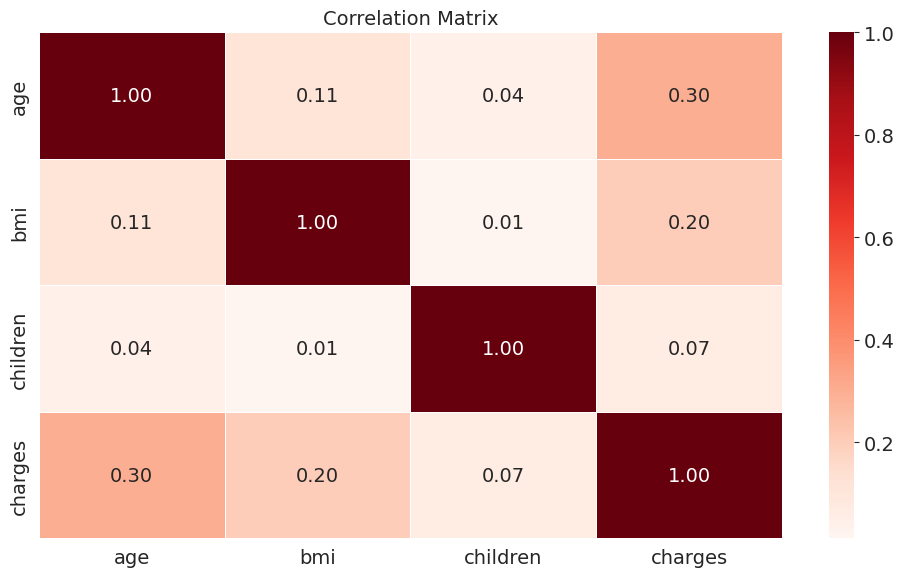

In [98]:
corr_matrix = medical_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10, 6))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='Reds', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

# Linear Regression Using a Single Feature

The **"smoker"** and **"age"** columns have the strongest correlation with **"charges"**.  
<br>  
**Estimate the value of "charges" using "age" for non-smokers.**


In [99]:
#get dataframe for non-smokers
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


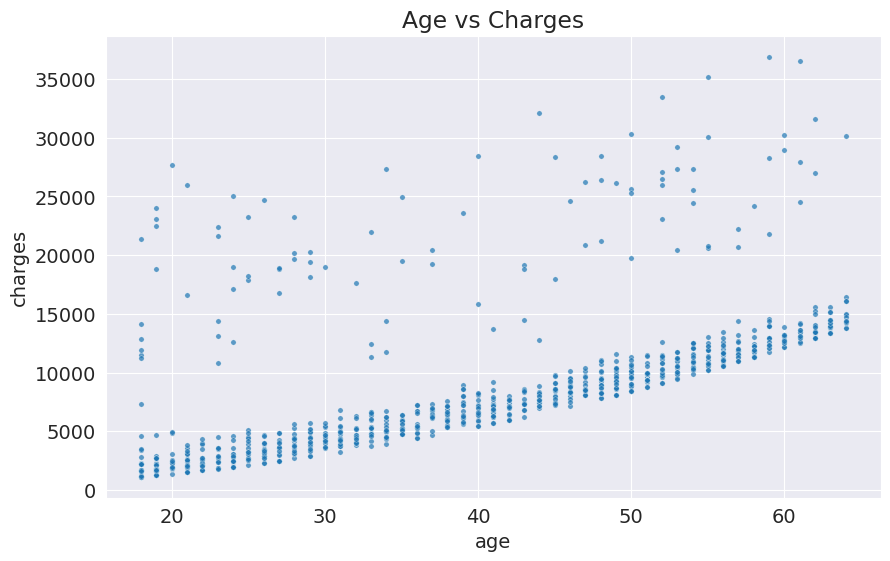

In [100]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)
plt.show()

#Model

charges = wx + b <br>
    w : slope, 
    b : intercept


In [101]:
def estimate_charges(age, w, b):
    return w * age + b


In [102]:
#Let is guess the values w and b and use it to estimate our first charges.
w=50
b=100

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

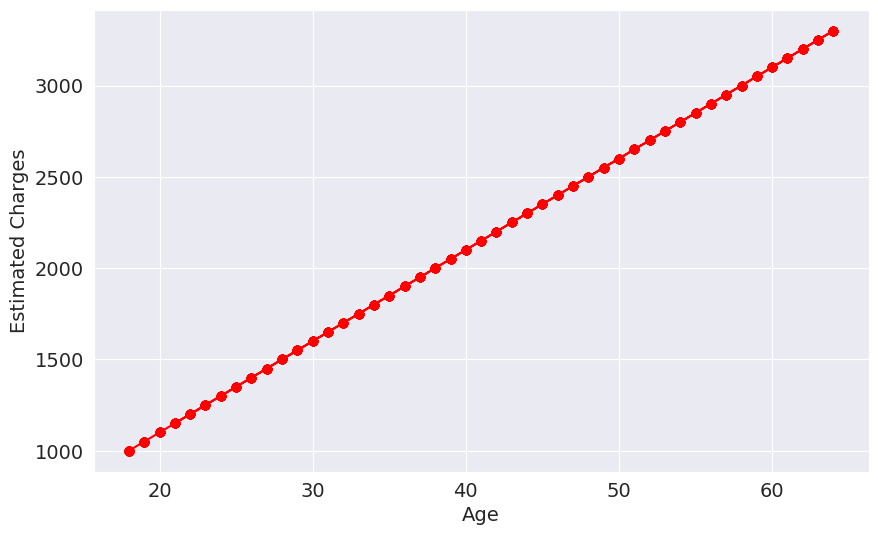

In [103]:
plt.plot(ages,estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel("Estimated Charges")
plt.show()

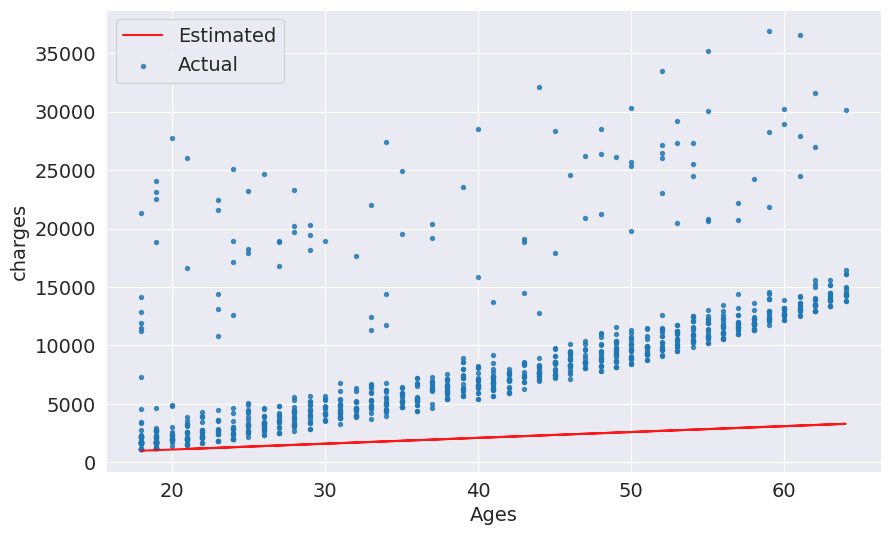

In [104]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel("Ages");
plt.ylabel("charges");
plt.legend(["Estimated", "Actual"]);

In [105]:
def try_parameters(w,b):
    """
    Find parameters that best predict charges based. 
    """
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel("Ages");
    plt.ylabel("charges");
    plt.legend(["Estimated", "Actual"]);


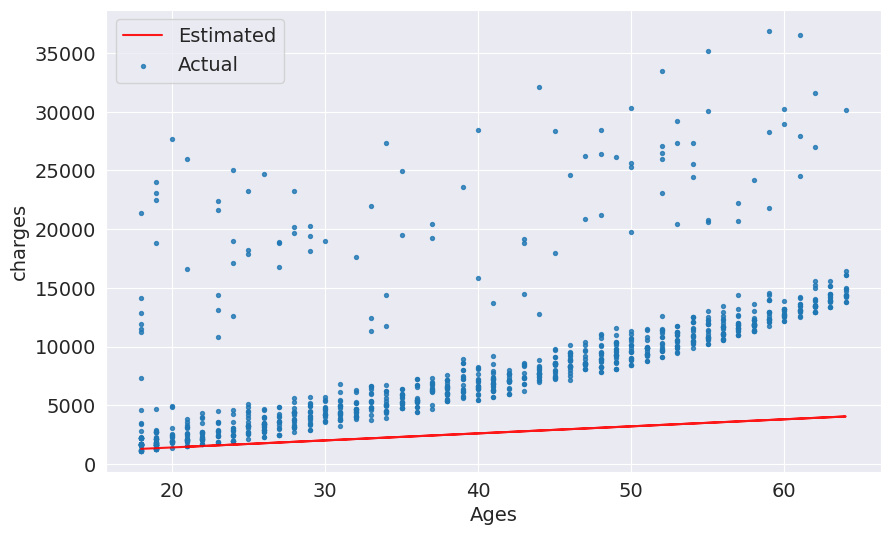

In [106]:
try_parameters(60,200)

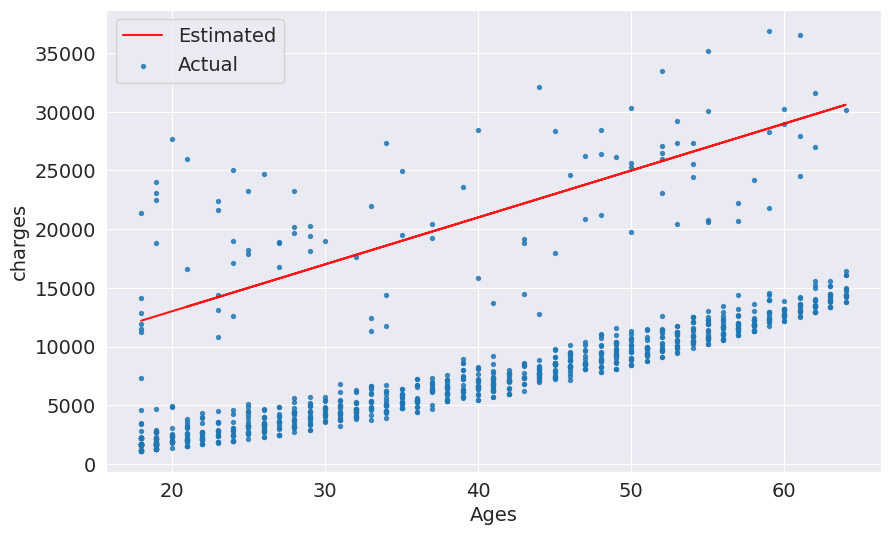

In [107]:
try_parameters(400,5000)

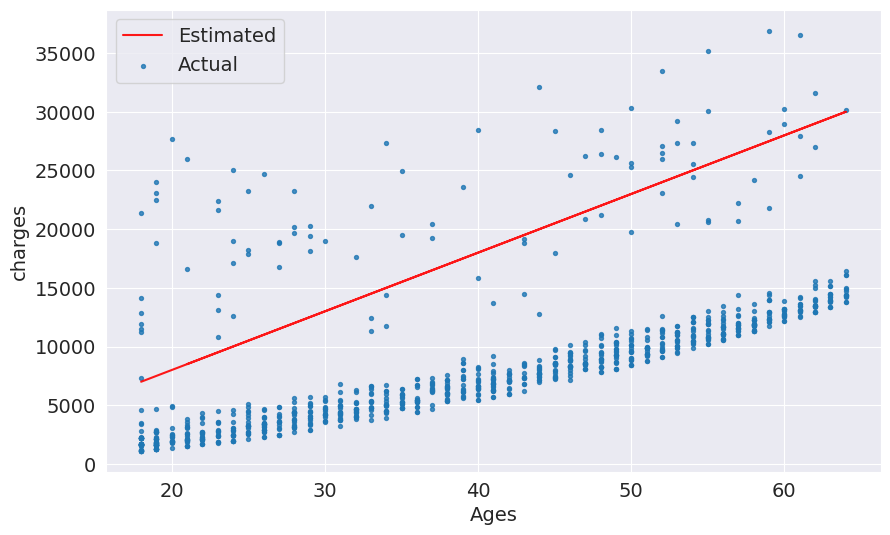

In [108]:
try_parameters(500,-2000)

# Loss/Cost Function
Compare  the model's prediction with actual targets

In [109]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [110]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [111]:
!pip install numpy --quiet

In [112]:
import numpy as np

In [113]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [114]:
w = 50
b = 100


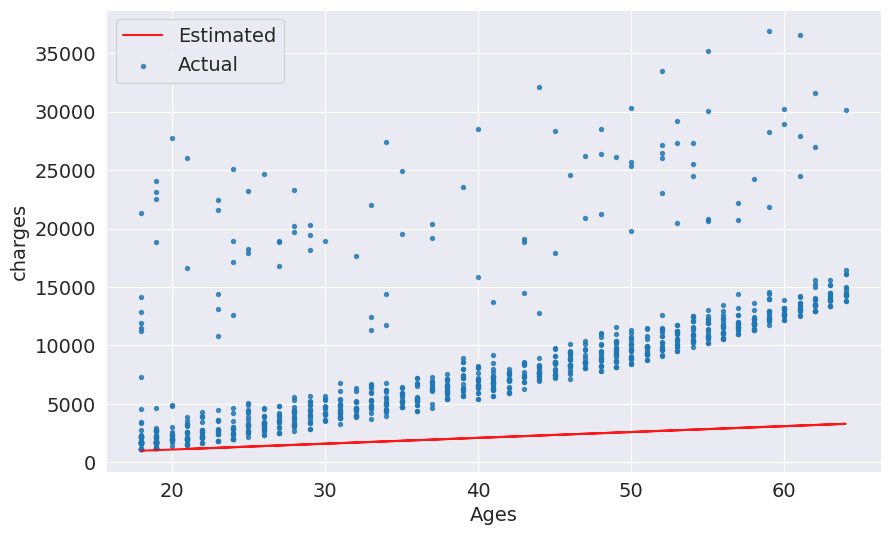

In [115]:
try_parameters(w,b)

In [116]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)


In [117]:
rmse(targets, predicted)

np.float64(8461.949562575493)

# Linear Regression using Scikit-Learn

In [118]:
!pip install scikit-learn --quiet

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [122]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('tnputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

tnputs.shape : (1064, 1)
targets.shape : (1064,)


In [123]:
model.fit(inputs, targets)

LinearRegression()

In [124]:
model.predict(np.array([
    [23],[37],[61]
]))

/home/moses/miniconda3/envs/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [125]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [126]:

rmse(targets,predictions)

np.float64(4662.505766636395)

Seem like the prediction is off by $4000 on average, which is not bad considering the fact that there are several outliers

In [127]:
#w
model.coef_


array([267.24891283])

In [128]:
#b
model.intercept_

np.float64(-2091.4205565650864)

In [129]:
#create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)
#Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss :", loss)

Loss : 4662.505766636395


# Linear Regression using Multiple Featrures

In [130]:
#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)
#Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss :", loss)

Loss : 4662.3128354612945


In [131]:
#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)
#Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss :", loss)

Loss : 4608.470405038247


# Binary Categories

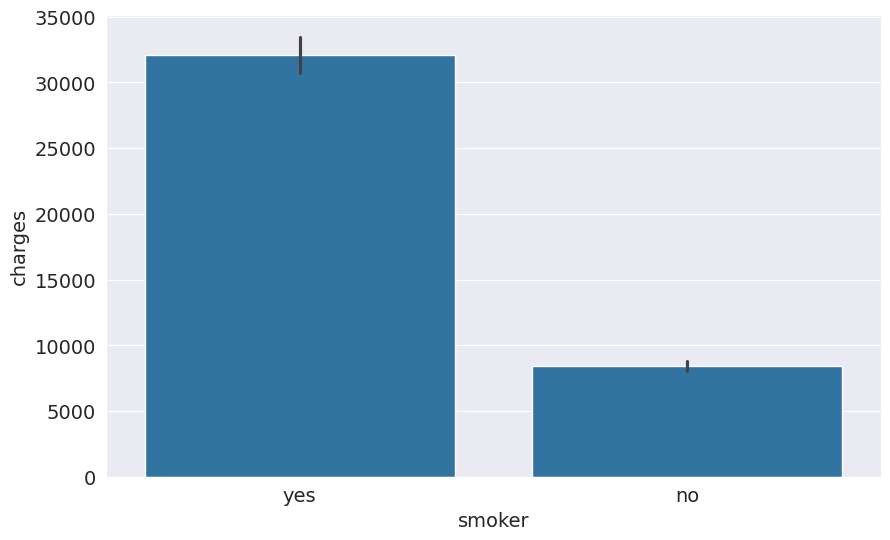

In [132]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [133]:
smoker_codes = {'no': 0 , 'yes' : 1}
medical_df['smoker_codes'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [134]:
medical_df.charges.corr(medical_df.smoker_codes)

np.float64(0.7872514304984767)

In [135]:
#create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)
#Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss :", loss)

Loss : 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

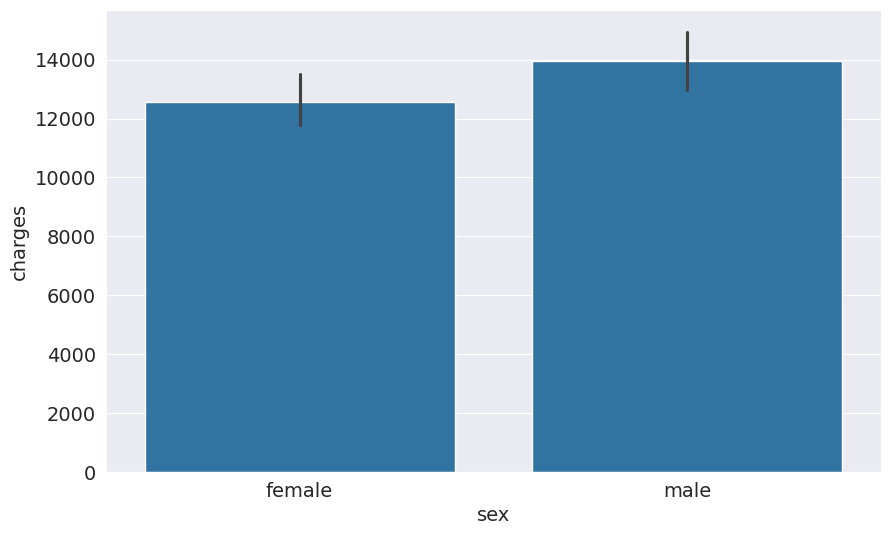

In [136]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [137]:
sex_codes = {'female': 0, "male" : 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025366)

In [138]:
#create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_code']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)
#Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss :", loss)

Loss : 6056.100708754546


# One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

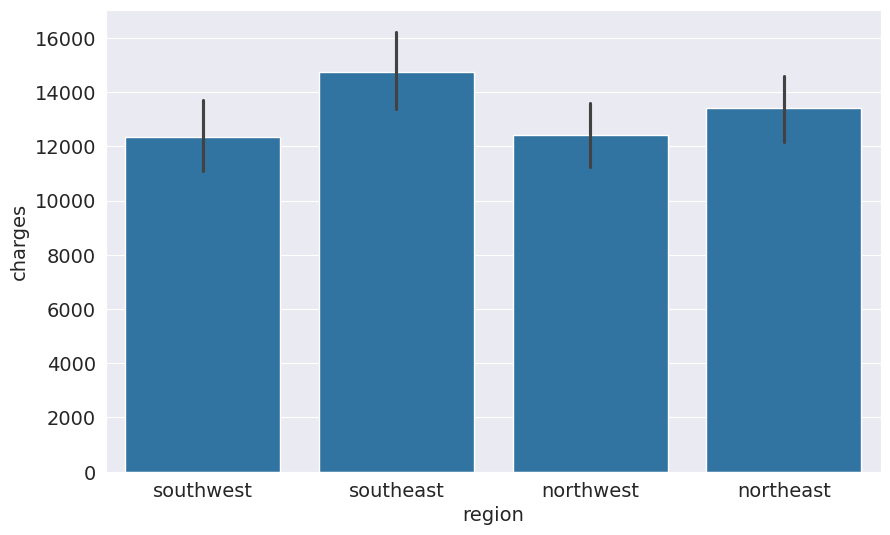

In [139]:
sns.barplot(data=medical_df, x='region', y='charges');


In [140]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [141]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [142]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [143]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [145]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_codes', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


# Model Improvements

## Feature Scaling

In [146]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [147]:
model.intercept_


np.float64(-12525.547811195454)

In [148]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df


,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_codes,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [149]:
medical_df


,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [150]:
from sklearn.preprocessing import StandardScaler


In [151]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [152]:
scaler.mean_


array([39.20702541, 30.66339686,  1.09491779])

In [153]:
scaler.mean_


array([39.20702541, 30.66339686,  1.09491779])

In [154]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [156]:
#now we combined with the categorical data
cat_cols = ['smoker_codes', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [157]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [158]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [159]:
from sklearn.model_selection import train_test_split

In [161]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [162]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6217.080103789238


In [163]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6022.944986576539
